
#**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

##**Edición 2024**

---

# Trabajo práctico entregable - Parte 2

Grupo de Trabajo 31
Integrantes del Grupo: 

Belen Franzoni

Belen Marzola

Guadalupe Peñaranda

Hisam Abou Faker

Marcelo Puiatti

Tutora: Yihara Isabel Mejia

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn

#seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url ='https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2023_processed.csv'
df0 = pd.read_csv(url)

In [3]:
df0[:3]

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,profile_studies_level_state,profile_career,Institución educativa,¿Salir o seguir contestando sobre las guardias?,work_on_call_duty,salary_on_call_duty_charge,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),680000.0,520000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,Varón Cis
1,Argentina,Catamarca,Full-Time,Staff (planta permanente),650000.0,520000.0,NaN,NaN,No,No recibo bono,...,Completo,Licenciatura en Sistemas de Información,Universidad Siglo 21,Terminar encuesta,NaN,NaN,NaN,NaN,45,Varón Cis
2,Argentina,Catamarca,Full-Time,Staff (planta permanente),125000.0,104000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,Mujer Cis


Se trabajará con los datos de **género** y de **salario NETO**.


# Tratamiento de los datos de género
A continuación se presentan los datos ingresados en esta columna. Las respuestas ingresadas son muy variadas.

In [4]:
df0.profile_gender.unique()

array(['Varón Cis', 'Mujer Cis', 'Hombre', 'Prefiero no decir', 'normal',
       'Varon', 'Agénero', 'Masculino', 'Dolarsexual', '.', 'Queer',
       'Mujer Trans', 'No binarie',
       'BIEN MACHO Y PORONGUDO. QUE CLASE DE OPCIONES DE MIERDA SON ESTAS?',
       'no entiendo por que la hacen tan dificil. que es eso de cis? soy heterosexual.',
       'Hombre..... tipo normal', 'Cis', 'varon, no se que es varon cis',
       'Dejen de preguntar boludeces', 'Normal', 'que pelotudos eh',
       'hombre', 'Helicoptero de ataque apache', 'Varón Trans',
       'Varoo natural', 'Varón', 'Bigénero', 'Mujer', 'Transformer',
       'Fluido', 'masculino', 'Hombre, macho silencioso', 'varón',
       'no compliquemos lo simple', 'Agenero, presentación mujer cis',
       'Me considero perteneciente al genero de los que no se identifican con ningun genero',
       'Macho', 'Porque tantas opciones? Solo hay 2. Soy hombre.',
       'heterosexual', 'Machote', 'Puto', 'Gris', 'Heterosexual',
       'Hombre

Realizamos una limpieza de datos, agrupamos y ordenamos.

In [5]:
#Renombra la columna por "profile_g" y busca las opciones dentro de la columna
# reemplaza las opciones de la columna por otros nombres segun mujer cis, hombre cis, diversidades.
# las respuestas random como pokemon las reemplaza por false para no eliminarlas, comando fillna
df0.loc[:,'profile_g'] = df0.profile_gender.replace({'Varón Cis': 'Varón cis','Varón':'Varón cis','Varon, sin mas':'Varón cis', 'Hombre Varón':'Varón cis', 'MASCULINO':'Varón cis',
                                                   'Mujer': 'Mujer cis', 'Mujer Cis': 'Mujer cis','Femenino': 'Mujer cis','mujer': 'Mujer cis','Mujer':'Mujer cis',
                                                   'Queer':'Diversidades','Varón Trans':'Diversidades','No binarie':'Diversidades','Mujer Trans':'Diversidades',
                                                   'Fluido':'Diversidades','Bigénero':'Diversidades','Gay':'Diversidades','Varon no Cis':'Diversidades',
                                                   'BIEN MACHO Y PORONGUDO. QUE CLASE DE OPCIONES DE MIERDA SON ESTAS?':'Varón cis',
                                                   'mujer':'Mujer cis',
                                                   'masculino':'Varón cis','hombre':'Varón cis','HOMBRE':'Varón cis','Varón':'Varón cis',
                                                   'Varon':'Varón cis', 'Hombre':'Varón cis','Hombre Normal':'Varón cis',
                                                   'Masculino':'Varón cis','Macho':'Varón cis',
                                                   'Varón Trans':'Diversidades','Queer':'Diversidades','No binarie':'Diversidades',
                                                   'Mujer Trans':'Diversidades','Agénero':'Diversidades','Bigénero':'Diversidades'
                                                   }).fillna(False)

A continuacion se presentan las respuestas parcialmente agrupadas. Vale aclarar que al hacer el agrupamiento de datos, utilizamos criterios personales para incluir algunas respuestas en un grupo "Diversidades", "Mujer cis" o "Varón cis"

In [6]:
unique_values, counts = np.unique(df0.profile_g, return_counts=True)

# Create a list of tuples containing unique values and their counts
value_counts = list(zip(unique_values, counts))

# Sort the list of tuples based on the count in descending order
sorted_value_counts = sorted(value_counts, key=lambda x: x[1], reverse=True)

# Print the sorted results for values that occur more than once
# Aquí modificando la opción count, podemos obtener las caldas con respuesta única, o no.
for value, count in sorted_value_counts:
    if count > 1:
        print(f"{value} occurs {count} times")


Varón cis occurs 4288 times
Mujer cis occurs 1036 times
Prefiero no decir occurs 237 times
Diversidades occurs 119 times
Heterosexual occurs 3 times
Normal occurs 3 times
No entiendo occurs 2 times
cis occurs 2 times
hetero occurs 2 times


# Tratamiento de datos de la columna Salario Neto

In [7]:
#Sacamos los NaN
df_sin_nan = df0.dropna(subset=['salary_monthly_NETO']).reset_index()

#Limpiamos la columna salario: sacamos los outliers
Q1 = df_sin_nan["salary_monthly_NETO"].quantile(.02)
Q3 = df_sin_nan["salary_monthly_NETO"].quantile(.98)
IQR = Q3 - Q1

df = df_sin_nan[~((df_sin_nan['salary_monthly_NETO']<(Q1))|(df_sin_nan['salary_monthly_NETO']>(Q3)))] #saco outliers


print('Q1: {} ::: Q3: {}'.format(int(Q1),int(Q3)))
print("Tamaño del DataSet completo: ", df0.shape)
print("Tamaño del DataSet quitando outliers: ", df.shape)

Q1: 288 ::: Q3: 2792309
Tamaño del DataSet completo:  (5805, 44)
Tamaño del DataSet quitando outliers:  (5342, 45)


Al igual que en el trabajo anterior, no se tomarán los valores de salarios extremadamente bajos y extremadamente altos (Quartiles 2 y 98), y se eliminan las entradas sin datos. Además, se descartan valores menores a $10.000, considerando que puede haber un error en la información de dicho dato (sueldo muy bajo).

Finalmente, creamos una serie de grupos, que podrán ser utilizados posteriormente:


*   Varón cis
*   Mujer cis
*   Diversidades
*   Prefieren no contestar
*   No clasificados


In [8]:
is_man = df.profile_g == 'Varón cis'
is_woman = df.profile_g == 'Mujer cis'
is_divers = df.profile_g == 'Diversidades'
is_No_contesta = df.profile_g == 'Prefiero no decir'
is_unclassified = ~(is_man | is_woman | is_divers | is_No_contesta)



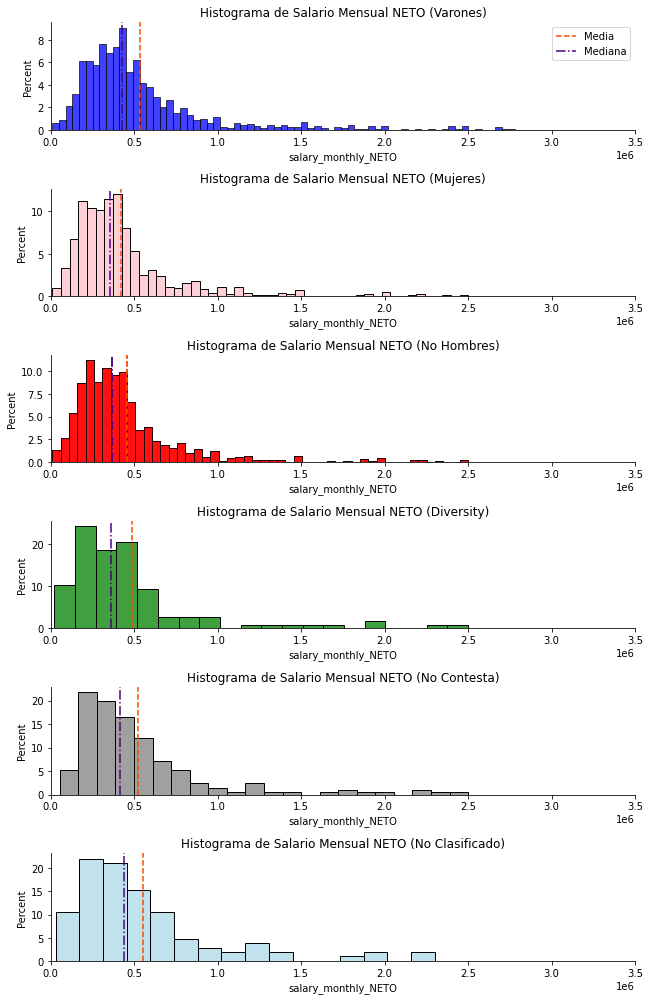

In [9]:

# @title Histogramas de los valores de "Salario Mensual NETO" del análisis de Datos por género
# @markdown
# @markdown Comparación de la Distribución de los Salarios
# @markdown


## La diferencia no siempre se aprecia en los gráficos
fig, axes = plt.subplots(nrows=6, figsize=(9, 14))

#filtered_df = df[df[salary_col] < 2000000]
seaborn.histplot(df[(df.salary_monthly_NETO > 10000) & is_man].salary_monthly_NETO, bins = "auto", ax=axes[0], color='blue',  stat = "percent")
axes[0].axvline(df[(df.salary_monthly_NETO > 10000) & is_man].salary_monthly_NETO.mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(df[(df.salary_monthly_NETO > 10000) & is_man].salary_monthly_NETO.median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[0].set_xlim(0, 3500000)
axes[0].set_title('Histograma de Salario Mensual NETO (Varones)')
axes[0].legend(loc='upper right')  # Add legend box at upper right corner



seaborn.histplot(df[(df.salary_monthly_NETO > 10000) & is_woman].salary_monthly_NETO, bins= "auto", ax=axes[1], color='pink',  stat = "percent")
axes[1].axvline(df[(df.salary_monthly_NETO > 10000) & is_woman].salary_monthly_NETO.mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(df[(df.salary_monthly_NETO > 10000) & is_woman].salary_monthly_NETO.median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[1].set_xlim(0, 3500000)
axes[1].set_title('Histograma de Salario Mensual NETO (Mujeres)')

#axes[0].legend()


seaborn.histplot(df[(df.salary_monthly_NETO > 10000) & -is_man].salary_monthly_NETO, bins= "auto", ax=axes[2], color='red',  stat = "percent")
axes[2].axvline(df[(df.salary_monthly_NETO > 10000) & -is_man].salary_monthly_NETO.mean(), color='orangered',
            linestyle='--', label='Media')
axes[2].axvline(df[(df.salary_monthly_NETO > 10000) & -is_man].salary_monthly_NETO.median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[2].set_xlim(0, 3500000)
axes[2].set_title('Histograma de Salario Mensual NETO (No Hombres)')

seaborn.histplot(df[(df.salary_monthly_NETO > 10000) & -is_man].salary_monthly_NETO, bins= "auto", ax=axes[2], color='red',  stat = "percent")
axes[2].axvline(df[(df.salary_monthly_NETO > 10000) & -is_man].salary_monthly_NETO.mean(), color='orangered',
            linestyle='--', label='Media')
axes[2].axvline(df[(df.salary_monthly_NETO > 10000) & -is_man].salary_monthly_NETO.median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[2].set_xlim(0, 3500000)
axes[2].set_title('Histograma de Salario Mensual NETO (No Hombres)')

seaborn.histplot(df[(df.salary_monthly_NETO > 10000) & is_divers ].salary_monthly_NETO, bins= "auto", ax=axes[3], color='green',  stat = "percent")
axes[3].axvline(df[(df.salary_monthly_NETO > 10000) & is_divers].salary_monthly_NETO.mean(), color='orangered',
            linestyle='--', label='Media')
axes[3].axvline(df[(df.salary_monthly_NETO > 10000) & is_divers].salary_monthly_NETO.median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[3].set_xlim(0, 3500000)
axes[3].set_title('Histograma de Salario Mensual NETO (Diversity)')

seaborn.histplot(df[(df.salary_monthly_NETO > 10000) & is_No_contesta ].salary_monthly_NETO, bins= "auto", ax=axes[4], color='gray',  stat = "percent")
axes[4].axvline(df[(df.salary_monthly_NETO > 10000) & is_No_contesta].salary_monthly_NETO.mean(), color='orangered',
            linestyle='--', label='Media')
axes[4].axvline(df[(df.salary_monthly_NETO > 10000) &  is_No_contesta].salary_monthly_NETO.median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[4].set_xlim(0, 3500000)
axes[4].set_title('Histograma de Salario Mensual NETO (No Contesta)')

seaborn.histplot(df[(df.salary_monthly_NETO > 10000) & is_unclassified ].salary_monthly_NETO, bins= "auto", ax=axes[5], color='lightblue',  stat = "percent")
axes[5].axvline(df[(df.salary_monthly_NETO > 10000) & is_unclassified].salary_monthly_NETO.mean(), color='orangered',
            linestyle='--', label='Media')
axes[5].axvline(df[(df.salary_monthly_NETO > 10000) &  is_unclassified].salary_monthly_NETO.median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[5].set_xlim(0, 3500000)
axes[5].set_title('Histograma de Salario Mensual NETO (No Clasificado)')

#axes[0].legend()


seaborn.despine()
plt.subplots_adjust(hspace=0.8)  # Adjust vertical spacing between subplots
plt.tight_layout()
plt.show()

In [10]:
# genera una columna con los salarios de los individuos que cumplan las condiciones salario mayor a 10000 y distintas condiciones de género
groupA = df[(df.salary_monthly_NETO > 10000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 10000) & is_woman].salary_monthly_NETO
groupC = df[(df.salary_monthly_NETO > 10000) & is_divers].salary_monthly_NETO
groupD = df[(df.salary_monthly_NETO > 10000) & is_No_contesta].salary_monthly_NETO
groupE = df[(df.salary_monthly_NETO > 10000) & is_unclassified].salary_monthly_NETO
groupNotA = df[(df.salary_monthly_NETO > 10000) & ~is_man].salary_monthly_NETO






## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros (diferencia de las medias entre el grupoA y grupoNotA).
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

In [11]:
groupA.describe().round(2) #Estadistica de cada grupo

count       3831.00
mean      537009.63
std       419671.24
min        10500.00
25%       293000.00
50%       425000.00
75%       610948.00
max      2783000.00
Name: salary_monthly_NETO, dtype: float64

In [12]:
groupNotA.describe().round(2)

count       1312.00
mean      455710.07
std       363929.86
min        10500.00
25%       240000.00
50%       370000.00
75%       513670.25
max      2500000.00
Name: salary_monthly_NETO, dtype: float64

Calculamos la estimacion puntual de la diferencia de las medias de cada grupo

In [13]:
#Estimacion puntual
point_estimate = groupA.mean() - groupNotA.mean()
print(f"Estimación puntual de la diferencia de medias: {point_estimate:.2f}")

Estimación puntual de la diferencia de medias: 81299.56


Calculamos el error estandar de la diferencia entre medias de los grupos A y B, a partir de las varianzas de las muestras.

In [14]:
#Error estandar de la diferencia de medias
#consideramos que ambos grupos son independientes por lo que cov(A,B) = 0
#(notar quew tienen distinto largo por lo que tampoco lo podemos calcular)
#Recordemo: var = (desv_s)^2 --> error_s = desv_s/sqr(N)
#Error standar de la suma a partir de propogar errores: Err_s_sum = sqrt(Err_s_A^{2} + Err_s_B^{2}) = sqrt(var_A/N_A + var_B/N_B )

se_difference = np.sqrt(np.var(groupA, ddof=1)/len(groupA) + np.var(groupNotA, ddof=1)/len(groupNotA))

print(f"Error estandar de la diferencia de medias: {se_difference:.2f}")

Error estandar de la diferencia de medias: 12121.15


Calculamos el error estandar a partir de la libreria scipy. Comparamos valores.

In [15]:
#Error estandar a partir de scipy

se_dif_auto = np.sqrt((sp.stats.sem(groupA, axis=None, ddof=0))**2 + (sp.stats.sem(groupNotA, axis=None, ddof=0))**2)
print(f"Error estandar de la diferencia de medias: {se_dif_auto:.2f}")

Error estandar de la diferencia de medias: 12117.48


Vemos que los resultados son "iguales". La pequeña diferencia entre ellos creemos que proviene de errores de calculo numérico.

A continuación calculamos el intervalo de confianza para un alpha = 0,05.

In [16]:
alpha = 0.05

In [17]:
#Intervalo de confianza para la diferencia entre medias
confidence_interval = sp.stats.norm.interval(1-alpha, loc=point_estimate, scale=se_difference)
print(f"Intervalo de confianza al {1-alpha} nivel: {confidence_interval}")

Intervalo de confianza al 0.95 nivel: (57542.54742996411, 105056.57786354104)


**¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?**

Hay una relación estrecha entre ambos conceptos.
En ambos casos se establece un intervalo o zona de rechazo (test de hipotesis) que va a depender del alpha que este eligiendo, es decir, el nivel de significancia.

En el caso del intervalo de confianza, establezco una región donde tengo la certeza (con el nivel de significancia impuesto, alpha) que mi estimador se va a encontrar.
En el test de hipotesis establezco una zona de rechazo para la cual mi hipotesis propuesta no es verdadera.
Un intervalo de confianza de 95% estaría relacionado con un Test de Hipótesis con una significancia del 5%.
Si bien los resultados del ambas están relacionados, son herramientas distintas. El **Intervalo de Confianza** es una herramienta de **estimación**, mientras que el **Test de Hipótesis** es una herramienta de **decisión**.

Al haber obtenido un intervalo de confianza para la diferencia de las medias que no incluya al cero (con un nivel de confianza del 5%), anticipa que el Test de Hipótesis (con un nivel de significancia del 5%) rechazará la Hipótesis Nula que plantea la igualdad de las medias.

## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0=...$

**Estadístico (Pivote)**
  * Identificar el estadístico
  * Escribir qué distribución tiene bajo $H_0$


**Hipótesis Nula**

$H_0 = \text{No hay diferencia entre las medias salariales de hombres (Grupo A) y el resto (Grupo B, formado por diversidades + mujeres + etc.)}$

$H_0: \text{Diferencia medias} = \text{Media Grupo A} - \text{Media Grupo B} = 0 $

**Hipótesis Alternativa**

$H_A = \text{Los hombres cobras mas que el resto}$

$H_A: \text{Media Grupo A} > \text{Media Grupo B}$


**Estadístico**

*   Pivote

Segun las filminas del teórico, el estadístico dado que tenemos dos

muestras aleatorias, independientes (asumimos covarianza nula) y de distinto tamaño, el pivote es:

$T=\frac{(\bar{X}-\bar{Y})-(\mu_1-\mu_2)}{S\sqrt{(n_1+n_2)/n_1n_2}}$

donde $S=\sqrt{\frac{\sum_{i=1}^{n_1}(X_i-\bar{X})^2+\sum_{i=1}^{n_2}(Y_i-\bar{Y})^2}{n_1+n_2-2}}$

*   Distribución:  La distribución que se tiene dada $H_0$ es la distribución *t-Student*

### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

**Test de Welch**

Es necesario implementar el test de welch ya que estamos trabajando con un estadístico calculado a partir de dos distribuciones que poseen distintos grados de libertad (distinta cantidad de datos), por lo que para poder encontrar el numero de grados de libertad efectivo, se implementa el test de Welch.

**Se Descartó Realizar el t-Test**
Este Test es válido para dos poblaciones de distinto tamaño, pero sólo si las varianzas de estas dos poblaciones son similares. Para corroborar esta hipótesis, hay que correr el Test de Barlett, bajo la **Hipótesis Nula** de que las varianzas son similares.

A continuación se realiza el **Test de Barlett** para corroborar esta primer hipótesis: Las varianzas de los 2 grupos de datos son similares (**Hipótesis Nula 1**) o son diferentes (**Hipótesis Alternativa**)

In [18]:
from scipy.stats import bartlett

# Realizar el test de Bartlett
estadistico, p_valor = bartlett(groupA, groupNotA)

# Imprimir los resultados
print("Estadístico de Bartlett:", estadistico)
print("Valor p:", p_valor)

# Interpretación del resultado
nivel_significancia = 0.05
if p_valor > nivel_significancia:
    print("No se rechaza la hipótesis nula. Las varianzas son iguales.")
else:
    print("Se rechaza la hipótesis nula. Las varianzas son diferentes.")


Estadístico de Bartlett: 37.78592152188218
Valor p: 7.894948024766677e-10
Se rechaza la hipótesis nula. Las varianzas son diferentes.


**Test de hipótesis - Empleando el Test de Welch**

Utilizando scipy es posible hacer el test de hipótesis solo dando los datos de entrada, en este caso serían:

*   Las medias y las desviaciones estandard de cada distribución que interviene en el cálculo de nuestro estadístico.
*   El número de grados de libertad de cada uno de ellos, explicitando además que las varianzas no son iguales, tal como se demostró en el punto anterior (entrada: "equal_var=False").  
*   Aclarar que el tipo de test es "de una sola cola" en este caso, por lo que la hipótesis alternativa es con un ">" (entrada: alternative = "greater")



In [19]:
# Definimos parámetros estadísticos a emplear en el Test de Welch

mean1 = groupA.mean()
std1=groupA.std()
nobs1= len(groupA)
mean2=groupNotA.mean()
std2=groupNotA.std()
nobs2= len(groupNotA)


In [20]:
# Porqué test de Welch: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html
# Calcular el estadístico t y el p-valor usando el Test de Welch

t_statistic, p_value = sp.stats.ttest_ind_from_stats(
    mean1, std1, nobs1,
    mean2, std2, nobs2,
    equal_var=False,
    alternative = "greater"
)

In [21]:
print(f"Estadístico t: {t_statistic}")
print(f"P-valor: {p_value}")

Estadístico t: 6.707248923841599
P-valor: 1.2129155147826946e-11


In [22]:
# Decisión basada en el p-valor
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa entre las medias de los grupos A y B.")
else:
    print("No rechazamos la hipótesis nula: no hay una diferencia significativa entre las medias de los grupos A y B.")

Rechazamos la hipótesis nula: hay una diferencia significativa entre las medias de los grupos A y B.


Tener un p_value tan pequeño indica que hay una evidencia muy fuerte en contra de la hipótesis nula. Veamos si los intervalos de cada conjunto (mean +- error estandar) se intersecan o discrepan.

In [23]:
error1 = std1/np.sqrt(nobs1)
error2 = std2/np.sqrt(nobs2)

print("mínimo del grupo A =", mean1-error1, "máximo del grupo B =", mean2+error2)

mínimo del grupo A = 530229.261864734 máximo del grupo B = 465757.3975237298


Vemos que los intervalos discrepan, por ende la hipotesis nula planteada carece de sentido para cualquier nivel de significancia "razonable" por lo que era esperable un p_value tan pequeño.

**¿Qué pasaría si comparamos otros grupos? Habría algún otro grupo que tenga una media similar a la del grupo "Hombre cis"**
Compararemos ahora dos grupos:


*  Hombres cis (Grupo A)
*  Personas que no respondieron sobre género (Grupo B)




In [24]:
groupA.describe().round(2) #Estadistica de cada grupo


count       3831.00
mean      537009.63
std       419671.24
min        10500.00
25%       293000.00
50%       425000.00
75%       610948.00
max      2783000.00
Name: salary_monthly_NETO, dtype: float64

In [25]:
groupD.describe().round(2) #Estadistica de cada grupo

count        207.00
mean      523504.71
std       418602.29
min        55000.00
25%       269000.00
50%       413000.00
75%       601500.00
max      2500000.00
Name: salary_monthly_NETO, dtype: float64

In [26]:
# Definimos parámetros estadísticos a emplear en el Test de Welch
mean1_2 = groupA.mean()
std1_2=groupA.std()
nobs1_2= len(groupA)
mean2_2=groupD.mean()
std2_2=groupD.std()
nobs2_2= len(groupD)



In [27]:
# Porqué test de Welch: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html
# Calcular el estadístico t y el p-valor usando el Test de Welch

t_statistic_2, p_value_2 = sp.stats.ttest_ind_from_stats(
    mean1_2, std1_2, nobs1_2,
    mean2_2, std2_2, nobs2_2,
    equal_var=False,
    alternative = "greater"
)

In [28]:
print(f"Estadístico t: {t_statistic_2}")
print(f"P-valor: {p_value_2}")

Estadístico t: 0.4520551479593593
P-valor: 0.3258286221411534


In [29]:
# Decisión basada en el p-valor
if p_value_2 < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa entre las medias de los grupos A y B.")
else:
    print("No rechazamos la hipótesis nula: no hay una diferencia significativa entre las medias de los grupos A y B.")

No rechazamos la hipótesis nula: no hay una diferencia significativa entre las medias de los grupos A y B.


**Hipótesis Aceptada**
La media de estos grupos es significativamente similar (537.000 *vs.* 527.500)

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

Repito el Test de WELCH para los grupos "Hombres cis" *vs.* el resto de las respuestas

In [30]:

    mean1 = groupA.mean()
    std1=groupA.std()
    nobs1= len(groupA)
    mean2=groupNotA.mean()
    std2=groupNotA.std()
    nobs2= len(groupNotA)


In [31]:
# Porqué test de Welch: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html
# Calcular el estadístico t y el p-valor usando el Test de Welch

t_statistic, p_value = sp.stats.ttest_ind_from_stats(
    mean1, std1, nobs1,
    mean2, std2, nobs2,
    equal_var=False,
    alternative = "greater"
)

In [32]:
print(f"Estadístico t: {t_statistic}")
print(f"P-valor: {p_value}")

Estadístico t: 6.707248923841599
P-valor: 1.2129155147826946e-11


In [33]:
from statsmodels.stats.power import tt_ind_solve_power

Recordemos la desviacion estandar combinada:
$S=\sqrt{\frac{\sum_{i=1}^{n_1}(X_i-\bar{X})^2+\sum_{i=1}^{n_2}(Y_i-\bar{Y})^2}{n_1+n_2-2}}$

In [34]:
#calculo desviacion estandar combinada
s_comb = np.sqrt(((nobs1 - 1) * std1**2 + (nobs2 - 1) * std2**2) / (nobs1 + nobs2 - 2))


In [35]:
effect_size = (mean1 - mean2) / s_comb #porque no divide por la desviacion estandar combinada?

# nobs1=None  - What we want to know
alpha = 0.05
ratio = nobs1 / nobs2
power = [0.8, 0.9, 0.95]

In [36]:
sample_sizes = [tt_ind_solve_power(effect_size=effect_size, alpha=alpha,power=p,  ratio=ratio) for p in power]
print(nobs1)
print(nobs2)

3831
1312


In [37]:
# Tamaño de muestras para los distintos poderes estadisticos (power)
for p, size in zip(power, sample_sizes):
    print(f"Para un poder estadístico de {p}, el tamaño necesario de la muestra es {size:.2f}")

Para un poder estadístico de 0.8, el tamaño necesario de la muestra es 263.51
Para un poder estadístico de 0.9, el tamaño necesario de la muestra es 352.59
Para un poder estadístico de 0.95, el tamaño necesario de la muestra es 435.94


Para un poder estadístico de 0.8, se necesitarían algo menos de 265 participantes.
Para un poder estadístico de 0.9, se necesitarían aproximadamente 355 participantes.
Para un poder estadístico de 0.95, se necesitarían aproximadamente 440 participantes.
Estos tamaños de muestra son para asegurar que el test tenga una alta probabilidad de detectar una diferencia real entre los grupos, si existe, con el nivel de poder estadístico deseado. Dado que el tamaño de las muestras actuales (3831 para el grupo A y 1312 para el grupo B) son mayores que los tamaños de muestra necesarios para los poderes estadísticos calculados, podemos concluir que las muestras son suficientemente grandes para detectar diferencias significativas entre los grupos.


En resumen, basándonos en los tamaños de muestras, parece que el estudio tiene un poder estadístico adecuado para ser representativo de la tendencia general y podría considerarse suficientemente robusto para ser usado en un juicio penal.

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave:
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle.
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


# Comunicación de resultados - formato Tweet
Seleccionamos este formato para la comunicación de los resultados, de manera rápida y gráfica.
Como datos a informar:


1.  Relación de trabajadores Hombres vs Mujeres (considerando "Hombres" a "Varones cis" y "Mujeres" a "Mujeres cis", dentro de nuestra base de datos)
 4,13 a 1. Lo consideramos 4 a 1
2.   Porcentaje de trabajadores dentro del grupo LGBT+ (Tomados de nuestra base de Datos, dentro del grupo Diversidad)
2,04%
3.   Relación de Salarios Hombre/Mujer (Tomado a partir de la comparación de las medias de salarios Netos, de los grupos "Varones cis" y "Mujeres cis" )
**537 K** "Hombres"
**424 K** "Mujeres"

Se pueden plantear 2 alternativas, las mujeres ganan 20 % menos que los hombres o los hombres ganan 25% más que las mujeres. Consideramos que el mensaje sobre la *brecha salarial* se refuerza más con el concepto de que un grupo gana menos que otro grupo, y por ello elejimos esta última relación para dar el mensaje comunicacional.

